#Trabajo Práctico N° 1 - Parte 2 - Hilos

Integrantes:

- Emanuel Rodriguez
- Ezequiel Catania
- Julian Castellana
- Miguel Ledesma
- Santiago Galo

# Ejercicio 1


In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,932 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,722 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,901

In [ ]:
!apt-get install g++

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
g++ is already the newest version (4:11.2.0-1ubuntu1).
g++ set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
%%writefile threads.cpp

#include <fstream>
#include <iostream>
#include <thread>
#include <vector>
#include <random>
#include <chrono>

using namespace std;

const int DURATION_MIN_MS = 100;
const int DURATION_MAX_MS = 200;
const double SUCCESS_PROBABILITY = 0.5;
const int PROBABILITY_RANGE = 100;
const int CHAKRA_MIN = 5;
const int CHAKRA_MAX = 10;

struct FinalResult
{
    int clones;
    double duration;
    int totalLevel;
};

int trainClone(int id_clon)
{
    int chakra = CHAKRA_MIN + rand() % (CHAKRA_MAX - CHAKRA_MIN + 1);
    int level = 0;
    for (int i = 0; i < chakra; ++i)
    {
        int duration = DURATION_MIN_MS + rand() % (DURATION_MAX_MS - DURATION_MIN_MS + 1);
        this_thread::sleep_for(chrono::milliseconds(duration));
        if (rand() % PROBABILITY_RANGE < SUCCESS_PROBABILITY * PROBABILITY_RANGE)
        {
            level++;
        }
    }
    return level;
}

void LaunchThreads(int numClones, vector<int>& levels)
{
    vector<thread> clones;
    for (int i = 0; i < numClones; ++i)
    {
        clones.emplace_back([i, &levels]()
        {
            levels[i] = trainClone(i);
        });
    }

    for (auto& clone : clones)
    {
        clone.join();
    }
}

int CalculateTotalLevel(const vector<int>& levels)
{
    int totalLevel = 0;
    for (int level : levels)
    {
        totalLevel += level;
    }
    return totalLevel;
}

void PrintResults(int numClones, const vector<int>& levels, int totalLevel, double duration)
{
    for (int i = 0; i < numClones; ++i)
    {
        cout << "El clon " << i + 1 << " alcanzó el nivel " << levels[i] << endl;
    }
    cout << "Nivel total alcanzado: " << totalLevel << endl;
    cout << "Tiempo total: " << duration << " segundos" << endl;
    cout << "------------------------------------------" << endl;
}

void SaveSummaryInCSV(const vector<FinalResult>& results, const string& fileName)
{
    ofstream file(fileName);
    if (!file.is_open())
    {
        cerr << "Error al abrir el archivo " << fileName << endl;
        return;
    }

    file << "Clones,Duracion,NivelTotal\n";
    for (const auto& res : results)
    {
        file << res.clones << "," << res.duration << "," << res.totalLevel << "\n";
    }

    file.close();
    cout << "Comparativa guardada en " << fileName << endl;
}

int main()
{
    vector<int> cloneCounts = {5, 10, 20, 40, 60, 70};
    vector<FinalResult> summary;
    for (int numClones : cloneCounts)
    {
        cout << "\n--- Ejecutando con " << numClones << " clones ---" << endl;
        vector<int> levels(numClones, 0);
        auto startTime = chrono::high_resolution_clock::now();
        LaunchThreads(numClones, levels);
        auto endTime = chrono::high_resolution_clock::now();
        chrono::duration<double> duration = endTime - startTime;
        int totalLevel = CalculateTotalLevel(levels);

        PrintResults(numClones, levels, totalLevel, duration.count());

        summary.push_back({numClones, duration.count(), totalLevel});
    }

    SaveSummaryInCSV(summary, "resumen.csv");

    return 0;
}

Writing threads.cpp


Compilamos el programa:

In [ ]:
!g++ threads.cpp -o threads

Ejecutamos el programa:

In [ ]:
!./threads


--- Ejecutando con 5 clones ---
El clon 1 alcanzó el nivel 4
El clon 2 alcanzó el nivel 4
El clon 3 alcanzó el nivel 1
El clon 4 alcanzó el nivel 4
El clon 5 alcanzó el nivel 3
Nivel total alcanzado: 16
Tiempo total: 1.55108 segundos
------------------------------------------

--- Ejecutando con 10 clones ---
El clon 1 alcanzó el nivel 5
El clon 2 alcanzó el nivel 3
El clon 3 alcanzó el nivel 2
El clon 4 alcanzó el nivel 2
El clon 5 alcanzó el nivel 7
El clon 6 alcanzó el nivel 2
El clon 7 alcanzó el nivel 5
El clon 8 alcanzó el nivel 5
El clon 9 alcanzó el nivel 6
El clon 10 alcanzó el nivel 5
Nivel total alcanzado: 42
Tiempo total: 1.58945 segundos
------------------------------------------

--- Ejecutando con 20 clones ---
El clon 1 alcanzó el nivel 2
El clon 2 alcanzó el nivel 2
El clon 3 alcanzó el nivel 4
El clon 4 alcanzó el nivel 3
El clon 5 alcanzó el nivel 3
El clon 6 alcanzó el nivel 1
El clon 7 alcanzó el nivel 5
El clon 8 alcanzó el nivel 6
El clon 9 alcanzó el nivel 5
El

Listamos a ver si la comparativa está guardada para luego hacer el gráfico

In [ ]:
!ls

ProgaConcu  resumen.csv  sample_data  threads  threads.cpp


Vemos el contenido:

In [ ]:
!cat resumen.csv

Clones,Duracion,NivelTotal
5,1.55108,16
10,1.58945,42
20,1.58143,78
40,1.60069,148
60,1.62481,220
70,1.67478,246


Hacemos el grafico utilizando PANDAS en python:

   Clones  Duracion  NivelTotal
0       5   1.55108          16
1      10   1.58945          42
2      20   1.58143          78
3      40   1.60069         148
4      60   1.62481         220
5      70   1.67478         246


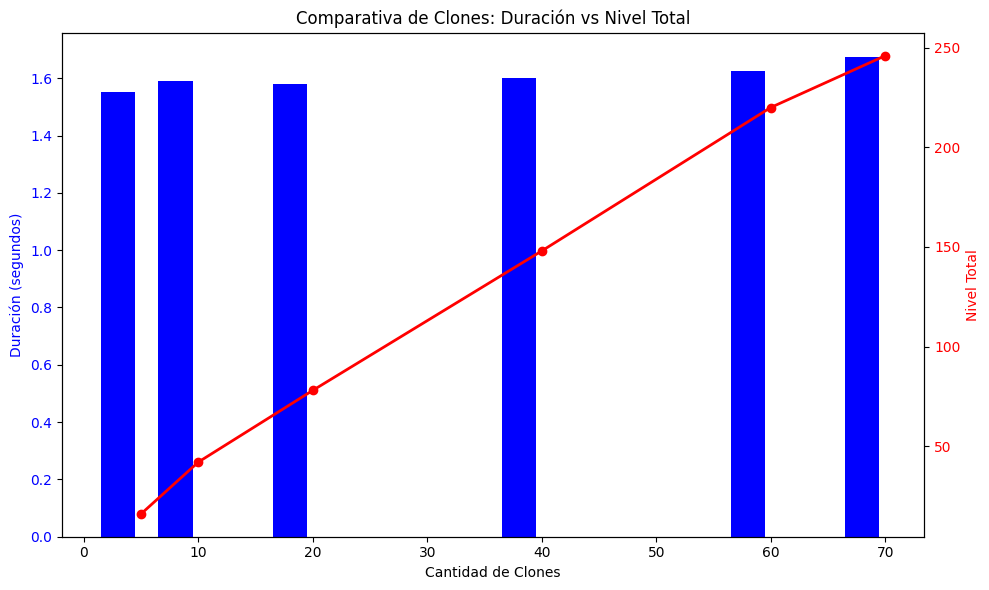

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('resumen.csv')

print(df)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(df['Clones'] - 2, df['Duracion'], width=3, color='b', label='Duración (s)')
ax1.set_xlabel('Cantidad de Clones')
ax1.set_ylabel('Duración (segundos)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df['Clones'], df['NivelTotal'], color='r', marker='o', label='Nivel Total', linestyle='-', linewidth=2)
ax2.set_ylabel('Nivel Total', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Comparativa de Clones: Duración vs Nivel Total')
fig.tight_layout()

plt.show()


## **Conclusión:**

Como se puede observar, la duración es casi la misma en todos los casos, pero el nivel obtenido con una mayor cantidad de clones es mayor.

# Ejercicio 2


Primero descargamos las dependencias necesarias para compilar Java

In [ ]:
!apt update
!apt install default-jdk -y

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,702 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,245 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,948 kB]
Get:13 https://r2u



> Ahora creamos el directorio donde vamos a crear nuestro proyecto de Java



In [ ]:
!mkdir -p ProgaConcu

En la clase League, agruparemos lo que seria la funcion para calcular fixture, y lo usaremos como Main, procesando el torneo de forma secuencial y concurrente (usando pool de  hilos), y mostrando la comparacion de tiempos al final de la ejecucion.

Diseño del fixture: se utilizo un algoritmo de Round Robin y se implemento una logica para alternar partidos de visitante y de local de cada equipo.

In [ ]:
%%writefile ProgaConcu/League.java

// File: ProgaConcu/League.java
package ProgaConcu;

import java.util.ArrayList;
import java.util.List;
import java.util.concurrent.CountDownLatch;
import java.util.concurrent.ExecutorService;
import java.util.concurrent.Executors;

public class League
{

  private static final int NUMBER_OF_TEAMS = 20;
  private static final int FIXED_TEAM_INDEX = NUMBER_OF_TEAMS - 1;

  public static void main(String[] args)
  {
    String[] teamNames =
    {
        "Boca", "River", "San Lorenzo", "Ferro", "Huracan", "Velez", "Estudiantes", "Belgrano",
        "Lanus", "Talleres", "Dep Español", "San Martin(T)", "Mandiyu", "Rosario Central",
        "Independiente", "Racing Club", "Gimnasia LP", "Platense", "Argentinos", "Newells"
    };

    sequentialProcessing(teamNames);
    concurrentProcessing(teamNames);
  }

  public static Match[][] calculateFixture(List<Team> teams)
  {
    int numberOfTeams = teams.size();
    int numberOfRounds = numberOfTeams - 1;
    int matchesPerRound = numberOfTeams / 2;

    Match[][] fixture = new Match[numberOfRounds][matchesPerRound];

    for (int round = 0; round < numberOfRounds; round++)
    {
      for (int matchIndex = 0; matchIndex < matchesPerRound; matchIndex++)
      {
        int homeIndex = (round + matchIndex) % (numberOfTeams - 1);
        int awayIndex = (numberOfTeams - 1 - matchIndex + round) % (numberOfTeams - 1);

        if (matchIndex == 0)
        {
          awayIndex = FIXED_TEAM_INDEX;
        }

        Team home = teams.get(homeIndex);
        Team away = teams.get(awayIndex);

        // alternamos partidos visitante y de local
        if (round % 2 == 0 && matchIndex == 0)
        {
          fixture[round][matchIndex] = new Match(away, home);
        }
        else
        {
          fixture[round][matchIndex] = new Match(home, away);
        }
      }
    }

    return fixture;
  }

  public static void sequentialProcessing(String[] names)
  {
    List<Team> teams = new ArrayList<>();

    for (String name : names)
    {
      teams.add(new Team(name));
    }

    Match[][] fixture = calculateFixture(teams);

    long startTime = System.currentTimeMillis();

    for (Match[] round : fixture)
    {
      for (Match match : round)
      {
        match.simulate();
      }
      Standings.sort(teams);
    }

    Standings.display(teams);

    long endTime = System.currentTimeMillis();
    System.out.println("Sequential execution time: " + (endTime - startTime) / 1000 + " seconds");
  }

  public static void concurrentProcessing(String[] names)
  {
    List<Team> teams = new ArrayList<>();

    for (String name : names)
    {
      teams.add(new Team(name));
    }

    Match[][] fixture = calculateFixture(teams);

    long startTime = System.currentTimeMillis();

    int threadPoolSize = fixture[0].length;
    ExecutorService executor = Executors.newFixedThreadPool(threadPoolSize);

    for (Match[] round : fixture)
    {
      CountDownLatch latch = new CountDownLatch(round.length);

      for (Match match : round)
      {
        executor.execute(() ->
        {
          match.simulate();
          latch.countDown();
        });
      }

      try
      {
        latch.await();
      }
      catch (InterruptedException e)
      {
        Thread.currentThread().interrupt();
        System.err.println("Interrupted while waiting for match simulations.");
      }

      Standings.sort(teams);
    }

    executor.shutdown();

    Standings.display(teams);

    long endTime = System.currentTimeMillis();
    System.out.println("Concurrent execution time: " + (endTime - startTime) / 1000 + " seconds");
  }
}



Writing ProgaConcu/League.java


En la clase Standings, implementamos las funcionalidades para manipular la lista de equipos:

sort: en esta función ordenamos la lista por Puntos, Diferencia de Gol y Goles a favor.

display: en esta función mostramos la lista con un formato prolijo.

In [ ]:
%%writefile ProgaConcu/Standings.java

package ProgaConcu;

import java.util.Collections;
import java.util.Comparator;
import java.util.List;

public class Standings
{
    public static void sort(List<Team> teams)
    {
        Collections.sort(teams, new Comparator<Team>()
        {
            @Override
            public int compare(Team t1, Team t2)
            {
                // primer criterio: puntos
                if (t2.getPoints() != t1.getPoints())
                {
                    return Integer.compare(t2.getPoints(), t1.getPoints());
                }
                // segundo criterio: diferencia de goles
                if (t2.getGoalDifference() != t1.getGoalDifference())
                {
                    return Integer.compare(t2.getGoalDifference(), t1.getGoalDifference());
                }
                // tercer criterio: goles a favor
                return Integer.compare(t2.getGoalsFor(), t1.getGoalsFor());
            }
        });
    }

    public static void display(List<Team> teams)
    {
        System.out.printf("%-20s %3s %3s %3s %3s %3s %3s %3s %4s%n",
            "Team", "PTS", "MP", "W", "D", "L", "GF", "GA", "GD");
        for (Team t : teams)
        {
            System.out.printf("%-20s %3d %3d %3d %3d %3d %3d %3d %4d%n",
                t.getName(), t.getPoints(), t.getMatchesPlayed(), t.getWins(),
                t.getDraws(), t.getLosses(), t.getGoalsFor(),
                t.getGoalsAgainst(), t.getGoalDifference());
        }
    }
}




Writing ProgaConcu/Standings.java


La clase Match, nos sirve para guardar los encuentros por fecha, y además para simularlos.

simulate: generamos aleatoriamente entre 0 y 5 goles por equipo, en base a estos, definimos ganador, perdedor o empate, y actualizamos las estadísticas de ambos equipos. También obligamos a que dure entre 100 y 150 ms como indica la consigna.

In [ ]:
%%writefile ProgaConcu/Match.java

package ProgaConcu;

import java.util.concurrent.ThreadLocalRandom;

public class Match
{
    private Team homeTeam;
    private Team awayTeam;

    private static final int MAX_GOALS = 5;
    private static final int MIN_SLEEP_MS = 100;
    private static final int MAX_SLEEP_MS = 150;
    private static final int WIN_POINTS = 3;
    private static final int DRAW_POINTS = 1;

    public Match(Team homeTeam, Team awayTeam)
    {
        this.homeTeam = homeTeam;
        this.awayTeam = awayTeam;
    }

    public Team getHomeTeam()
    {
        return homeTeam;
    }

    public Team getAwayTeam()
    {
        return awayTeam;
    }

    /**
     * simula el partido entre dos equipos
     * actualiza goles, estadisticas y simula el tiempo de procesamiento
     */
    public void simulate()
    {
        long startTime = System.currentTimeMillis();

        // genera goles aleatoriamente para ambos equipos
        int homeGoals = ThreadLocalRandom.current().nextInt(0, MAX_GOALS + 1);
        int awayGoals = ThreadLocalRandom.current().nextInt(0, MAX_GOALS + 1);

        // actualizo estadisticas
        homeTeam.setGoalsFor(homeTeam.getGoalsFor() + homeGoals);
        homeTeam.setGoalsAgainst(homeTeam.getGoalsAgainst() + awayGoals);

        awayTeam.setGoalsFor(awayTeam.getGoalsFor() + awayGoals);
        awayTeam.setGoalsAgainst(awayTeam.getGoalsAgainst() + homeGoals);


        homeTeam.setGoalDifference(homeTeam.getGoalsFor() - homeTeam.getGoalsAgainst());
        awayTeam.setGoalDifference(awayTeam.getGoalsFor() - awayTeam.getGoalsAgainst());


        homeTeam.setMatchesPlayed(homeTeam.getMatchesPlayed() + 1);
        awayTeam.setMatchesPlayed(awayTeam.getMatchesPlayed() + 1);

        // determina el resultado del partido, y luego actualiza
        if (homeGoals > awayGoals)
        {
            homeTeam.setWins(homeTeam.getWins() + 1);
            awayTeam.setLosses(awayTeam.getLosses() + 1);
            homeTeam.setPoints(homeTeam.getPoints() + WIN_POINTS);
        }
        else if (awayGoals > homeGoals)
        {
            awayTeam.setWins(awayTeam.getWins() + 1);
            homeTeam.setLosses(homeTeam.getLosses() + 1);
            awayTeam.setPoints(awayTeam.getPoints() + WIN_POINTS);
        }
        else
        {
            homeTeam.setDraws(homeTeam.getDraws() + 1);
            awayTeam.setDraws(awayTeam.getDraws() + 1);
            homeTeam.setPoints(homeTeam.getPoints() + DRAW_POINTS);
            awayTeam.setPoints(awayTeam.getPoints() + DRAW_POINTS);
        }

        // simula el delay para que cada partido dure entre 100 y 150 ms
        long processingTime = System.currentTimeMillis() - startTime;
        long totalDuration = ThreadLocalRandom.current().nextLong(MIN_SLEEP_MS, MAX_SLEEP_MS + 1);
        long remainingTime = totalDuration - processingTime;

        if (remainingTime > 0)
        {
            try
            {
                Thread.sleep(remainingTime);
            }
            catch (InterruptedException e)
            {
                Thread.currentThread().interrupt();
            }
        }
    }
}


Writing ProgaConcu/Match.java


Usamos la clase Team para guardar las estadísticas de cada participante de la liga, para posteriormente mostrarlo ordenarlo y mostrarlo en una tabla.

In [ ]:
%%writefile ProgaConcu/Team.java
package ProgaConcu;

public class Team
{
    private String name;
    private int points;
    private int matchesPlayed;
    private int wins;
    private int losses;
    private int draws;
    private int goalsFor;
    private int goalsAgainst;
    private int goalDifference;

    public Team(String name)
    {
        this.name = name;
        this.points = 0;
        this.matchesPlayed = 0;
        this.wins = 0;
        this.losses = 0;
        this.draws = 0;
        this.goalsFor = 0;
        this.goalsAgainst = 0;
        this.goalDifference = 0;
    }

    // Getters y Setters

    public String getName()
    {
        return name;
    }

    public void setName(String name)
    {
        this.name = name;
    }

    public int getPoints()
    {
        return points;
    }

    public void setPoints(int points)
    {
        this.points = points;
    }

    public int getMatchesPlayed()
    {
        return matchesPlayed;
    }

    public void setMatchesPlayed(int matchesPlayed)
    {
        this.matchesPlayed = matchesPlayed;
    }

    public int getWins()
    {
        return wins;
    }

    public void setWins(int wins)
    {
        this.wins = wins;
    }

    public int getLosses()
    {
        return losses;
    }

    public void setLosses(int losses)
    {
        this.losses = losses;
    }

    public int getDraws()
    {
        return draws;
    }

    public void setDraws(int draws)
    {
        this.draws = draws;
    }

    public int getGoalsFor()
    {
        return goalsFor;
    }

    public void setGoalsFor(int goalsFor)
    {
        this.goalsFor = goalsFor;
    }

    public int getGoalsAgainst()
    {
        return goalsAgainst;
    }

    public void setGoalsAgainst(int goalsAgainst)
    {
        this.goalsAgainst = goalsAgainst;
    }

    public int getGoalDifference()
    {
        return goalDifference;
    }

    public void setGoalDifference(int goalDifference)
    {
        this.goalDifference = goalDifference;
    }
}



Writing ProgaConcu/Team.java


In [ ]:
!javac ProgaConcu/*.java

In [ ]:
!java ProgaConcu.League

Team                 PTS  MP   W   D   L  GF  GA   GD
Dep Español           39  19  13   0   6  58  41   17
Lanus                 36  19  12   0   7  63  44   19
Mandiyu               35  19  11   2   6  50  36   14
River                 35  19  10   5   4  50  39   11
Boca                  33  19  11   0   8  54  44   10
Gimnasia LP           32  19  10   2   7  59  59    0
Newells               31  19   9   4   6  54  43   11
San Martin(T)         31  19   9   4   6  46  37    9
San Lorenzo           31  19  10   1   8  56  53    3
Belgrano              28  19   9   1   9  51  46    5
Argentinos            28  19   8   4   7  51  50    1
Estudiantes           27  19   8   3   8  55  57   -2
Talleres              24  19   7   3   9  44  52   -8
Velez                 24  19   8   0  11  46  60  -14
Independiente         23  19   7   2  10  54  54    0
Platense              22  19   6   4   9  41  49   -8
Huracan               21  19   6   3  10  47  59  -12
Ferro                 21  19

# Ejercicio 3


Primero generamos el archivo "visualizaciones.csv" de ejemplo

In [ ]:
import csv

data = [
    ["user_id", "user_name", "title", "type", "genre"],
    [1, "p_kiki", "Hereditary", "Pelicula", "Terror"],
    [2, "daro123", "La Casa de Papel", "Serie", "Drama"],
    [1, "p_kiki", "The Office", "Serie", "Comedia"],
    [1, "p_kiki", "Game of Thrones", "Serie", "Drama"],
    [1, "p_kiki", "Breaking Bad", "Serie", "Drama"],
    [1, "p_kiki", "Vikings", "Serie", "Drama"],
    [3, "pepe22", "The Walking Dead", "Serie", "Zombies"]
]


with open("visualizaciones.csv", mode="w", newline='', encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(data)

print("Archivo 'visualizaciones.csv' creado con éxito.")


Archivo 'visualizaciones.csv' creado con éxito.


In [ ]:
import pandas as pd
import threading as th
import json


def main():

    input_file = 'visualizaciones.csv'
    output_file = 'preferencias.json'
    data_frame = pd.read_csv(input_file)
    preferences = []

    users = data_frame['user_id'].unique().tolist()
    threads = []

    for user in users:
        user_views = data_frame[data_frame['user_id'] == user]
        user_thread = th.Thread(target=get_preference, name=str(user), args=(user_views, preferences))
        user_thread.start()
        threads.append(user_thread)

    for thread in threads:
        thread.join()

    with open(output_file, "w") as f:
        json.dump(preferences, f, indent=4, ensure_ascii=False)

    print(f"El archivo {output_file} ha sido creado con éxito.")


def get_preference(user_views, preferences):

    user_preferences = {
        "user_id": str(user_views['user_id'].iloc[0]),
        "user_name": str(user_views['user_name'].iloc[0]),
        "chosen_type": str(get_preference_field(user_views, 'type')),
        "chosen_genre": str(get_preference_field(user_views, 'genre')),
        "total": int(user_views.shape[0]),
        "different_genres": int(user_views['genre'].unique().shape[0])
    }

    preferences.append(user_preferences)


def get_preference_field(user_views, field):

    return user_views[field].mode()[0]


if __name__ == "__main__":
    main()

El archivo preferencias.json ha sido creado con éxito.
